In [1]:
import os
import glob
import wfdb
import biosppy
import matplotlib.pyplot as plt
import csv

def get_records(fol_path):
    """ To get file paths """
    #print(fol_path)
    # There are 3 files for each record
    # *.atr is one of them
    paths = glob.glob(fol_path)
    
    # Get rid of the extension
    paths = [path[:-4] for path in paths]
    paths.sort()
    #print(paths)
    return paths


def save_fig(data, filename):
    """ Convert signal to Image"""

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.axis('off')
    plt.plot(data)

    extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    # plt.savefig(filename, bbox_inches=extent)
    print(filename)
    plt.close()


def segmentation(filename):
    """ Gets the ECG segment (wave) and saves to image """
    
    # to save images in new folder
    folder = '/'.join(filename.replace('1.0.0', 'filter').split('/')[:-1])
    print(folder)
    filename_new = filename.split('/')[-1]
    #print(filename_new)
    if not os.path.exists(folder):
        os.mkdir(folder)

    # reads raw signal (ECG I)
    record = wfdb.rdsamp(filename)
    # get the first column signal
    data = record[0][:, 1]
    signals = []
    count = 1

    # apply Christov Segmenter to get separate waves
    peaks = biosppy.signals.ecg.christov_segmenter(signal=data, sampling_rate=record['fs'])[0]
    for i in (peaks[1:-1]):
        diff1 = abs(peaks[count - 1] - i)
        diff2 = abs(peaks[count + 1] - i)
        x = peaks[count - 1] + diff1 // 2
        y = peaks[count + 1] - diff2 // 2
        signal = data[x:y]
        signals.append(signal)
        count += 1

    # save the first wave as the image
    lst = signals[0]
    print(lst)
    #save_fig(lst, '/'.join([folder, filename_new]))


if __name__ == '__main__':
    records = get_records(r'C:\Users\S545241\Desktop\ecg_img\ecg-id-database-1.0.0/*/*.atr')
    for record in records:
        segmentation(record)

ModuleNotFoundError: No module named 'biosppy'

(array([[-0.085, -0.115],
       [-0.08 , -0.115],
       [-0.07 , -0.12 ],
       ...,
       [-0.065, -0.035],
       [-0.08 , -0.035],
       [-0.08 , -0.035]]), {'fs': 500, 'sig_len': 10000, 'n_sig': 2, 'base_date': None, 'base_time': None, 'units': ['mV', 'mV'], 'sig_name': ['ECG I', 'ECG I filtered'], 'comments': ['Age: 25', 'Sex: male', 'ECG date: 07.12.2004']})
[ 352  727 1134 1599 2066 2525 2992 3436 3870 4293 4707 5118 5497 5865
 6224 6587 6958 7347 7735 8136 8545 8972 9397 9824]
C:/Users/S545241/Desktop/ecg_img/ecg-id-database-filter\Person_01\rec_1
(array([[ 0.105,  0.105],
       [ 0.135,  0.06 ],
       [ 0.115,  0.02 ],
       ...,
       [-0.175, -0.015],
       [-0.165, -0.02 ],
       [-0.05 , -0.03 ]]), {'fs': 500, 'sig_len': 10000, 'n_sig': 2, 'base_date': None, 'base_time': None, 'units': ['mV', 'mV'], 'sig_name': ['ECG I', 'ECG I filtered'], 'comments': ['Age: 25', 'Sex: male', 'ECG date: 15.03.2005']})
[ 138  435  768 1100 1434 1777 2128 2499 2884 3251 3622 3996 

IndexError: list index out of range

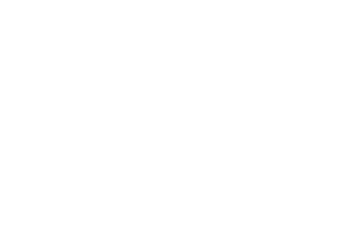

In [62]:
import os
import glob
import wfdb
import biosppy
import matplotlib.pyplot as plt
import csv
#%matplotlib inline



def get_records(fol_path):
    """ To get file paths """
    #print(fol_path)
    paths = glob.glob(fol_path)
    # Get rid of the extension
    paths = [path[:-4] for path in paths]
    paths.sort()
    #print(paths)
    return paths


def save_fig(data, filename):
    """ Convert signal to Image"""
    #print(data[0])
    #data = [1,2,3]
    fig = plt.figure()
    #print(fig)
    ax = fig.add_subplot(1, 1, 1)
    plt.axis('off')
    plt.plot(data[0])
    #print("aa")
    #print(plt)
    #plt.show()
    #extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    #plt.show()
    #print(extent)
    plt.savefig(filename)
    print(filename)
    plt.close()


def segmentation(filename):
    """ Gets the ECG segment (wave) and saves to image """
    #print(filename)
    #print('/'.join(filename.replace('1.0.0', 'filter').split('/')[:-1]))
    # to save images in new folder
    folder = '/'.join(filename.replace('1.0.0', 'filter').split('/')[:-1])
    #print(folder)
    filename_new = filename.replace('1.0.0', 'filter').split('/')[-1]
    #filename_new = filename_new[:len(filename_new)-6]
    #print(filename_new)
    if not os.path.exists('/'.join(folder)):
        try:
            os.makedirs(folder + '/' +filename_new)
        except:
            pass

    # reads raw signal (ECG I)
    record = wfdb.rdsamp(filename)
    print(record)
  
    # exporting a tuple variable into the csv file
    input_variable = record

    # Example.csv gets created in the current working directory
    with open('rec.csv', 'w', newline = '') as csvfile:
        my_writer = csv.writer(csvfile, delimiter = ' ')
        my_writer.writerow(input_variable)
    # get the first column signal
    data = record[0][:, 1]
    #print(data)
    signals = []
    count = 1
    #print(record[1]['fs'])

    # apply Christov Segmenter to get separate waves
    peaks = biosppy.signals.ecg.christov_segmenter(signal=data, sampling_rate=record[1]['fs'])[0]
    print(peaks)
    for i in (peaks[1:-1]):
        diff1 = abs(peaks[count - 1] - i)
        diff2 = abs(peaks[count + 1] - i)
        x = peaks[count - 1] + diff1 // 2
        y = peaks[count + 1] - diff2 // 2
        #print(diff1)
        #print(diff2)
        #print(x)
        #print(y)
        signal = data[x:y]
        #print(signal)
        signals.append(signal)
        count += 1
    
    sig = signals[0:1]
    #print(signals[0:1])
    # save the first wave as the image
    save_fig(sig , '/'.join([folder, filename_new]))


if __name__ == '__main__':
    records = get_records("C:/Users/S545241/Desktop/ecg_img/ecg-id-database-1.0.0/*/*.atr")
    for record in records:
        segmentation(record)

In [8]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [9]:
tf.__version__

'2.8.0'

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

SyntaxError: invalid syntax (981491274.py, line 5)